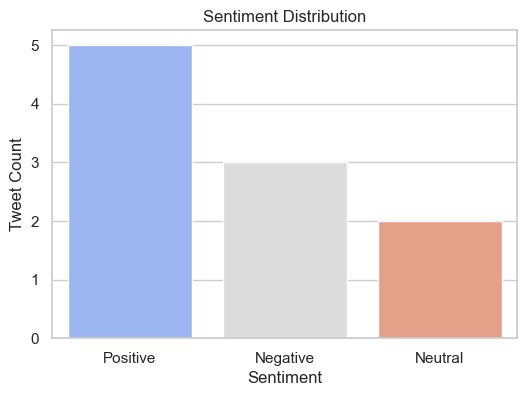

Device set to use cpu


,Tweet,Sentiment,Emotion,Confidence
0,I love this new phone! 😍,Positive,joy,0.98
1,"Ugh, I hate being stuck in traffic.",Negative,disgust,0.80
2,"I’m feeling okay, just a bit tired.",Positive,neutral,0.60
3,Such a beautiful morning!,Positive,joy,0.97
4,Why is everything going wrong today?,Negative,surprise,0.33
5,I'm not sure what to feel right now.,Positive,neutral,0.46
6,That movie was incredibly boring.,Negative,disgust,0.84
7,I am so grateful for my friends 💕,Neutral,joy,0.90
8,Nothing ever works out for me...,Neutral,sadness,0.76
9,I'm excited for the weekend!,Positive,joy,0.93


In [4]:
import os
import pandas as pd
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress Hugging Face symlink warning
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

# Optional: Transformer model
try:
    from transformers import pipeline
    transformers_installed = True
except ImportError:
    transformers_installed = False

# Sample tweets
tweets = [
    "I love this new phone! 😍",
    "Ugh, I hate being stuck in traffic.",
    "I’m feeling okay, just a bit tired.",
    "Such a beautiful morning!",
    "Why is everything going wrong today?",
    "I'm not sure what to feel right now.",
    "That movie was incredibly boring.",
    "I am so grateful for my friends 💕",
    "Nothing ever works out for me...",
    "I'm excited for the weekend!"
]

df = pd.DataFrame(tweets, columns=["Tweet"])

# TextBlob Sentiment
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["Sentiment"] = df["Tweet"].apply(get_sentiment)

# Sentiment distribution plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sentiment", hue="Sentiment", palette="coolwarm", legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

# Emotion detection using Hugging Face
if transformers_installed:
    emotion_classifier = pipeline(
        "text-classification",
        model="j-hartmann/emotion-english-distilroberta-base",
        top_k=1
    )

    def get_emotion(text):
        result = emotion_classifier(text)[0][0]  # Extract from nested list
        return result['label'], round(result['score'], 2)

    df[['Emotion', 'Confidence']] = df['Tweet'].apply(lambda x: pd.Series(get_emotion(x)))
    display(df)
else:
    print("Install the transformers library to enable emotion detection:\n!pip install transformers")
